<a href="https://colab.research.google.com/github/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/3_Clasificacion_Multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color: rgb(50, 120, 229);"> Clasificación Multiclase en Keras </font>

En este cuaderno, introduciremos varios conceptos nuevos asociados con el problema general de clasificación que implica más de dos clases.

Específicamente, en este cuaderno, veremos cómo clasificar dígitos escritos a mano de la base de datos MNIST. El conjunto de datos MNIST está incluido en Tensorflow y se puede importar y cargar fácilmente, como veremos a continuación.

Usando este conjunto de datos, demostraremos cómo trabajar con datos de imágenes que representan los dígitos $[0,9]$ y cómo desarrollar una arquitectura de red que incluya diez neuronas cuyas salidas representen la probabilidad de los dígitos.


<center><img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/images/mnist.png?raw=1" width="600"></center>

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'
plt.style.use("ggplot")

In [2]:
IMG_SIZE = (28, 28)
NUM_CLASSES = 10

BATCH_SIZE = 32
EPOCHS = 10

## <font style="color: rgb(50, 120, 229);"> 1. Cargar el conjunto de datos MNIST </font>

Como se discutió anteriormente, utilizaremos los datos de MNIST para nuestro experimento. Contiene `60000` imágenes de entrenamiento en escala de grises `28x28` y `10000` imágenes de prueba de `10` clases.

El conjunto de datos MNIST **ya viene incluido con Keras**. PyTorch proporciona acceso fácil a algunos conjuntos de datos estándar utilizando `keras.datasets`.


### <font style="color: rgb(50, 120, 229);"> 1.1 Descargar el conjunto de datos </font>

Cargamos los datos de entrenamiento y pruebas por separado.s.


In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


### <font style="color: rgb(50, 120, 229);"> 1.2 Visualizar algunas imágenes </font>

Ahora mostraremos una muestra de los datos de entrenamiento.

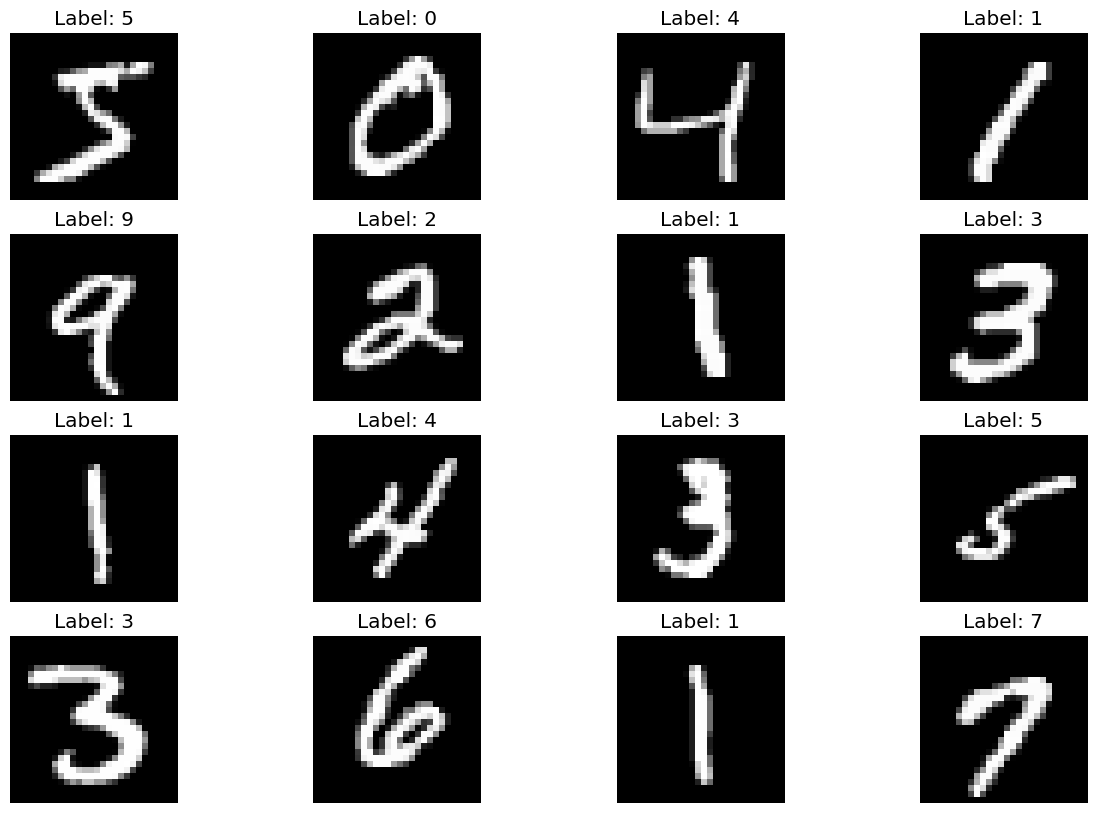

In [4]:
num_samples = 16
num_cols = 4
num_rows = num_samples // num_cols

plt.figure(figsize=(15, 10))

for i in range(num_samples):
    image = X_train[i]
    label = y_train[i]

    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Label: {label}")

plt.show()

### <font style="color: rgb(50, 120, 229);"> 1.3 Preprocesamiento de datos </font>

Antes de comenzar a entrenar la red, necesitamos aplicar algunas transformaciones a los datos.

**Cambiar la forma de los datos**:

Dado que ahora estamos trabajando con una imagen como entrada, necesitamos encontrar una forma lógica de representar los datos de la imagen como un conjunto de características. Un enfoque ingenuo que en realidad funciona bastante bien es simplemente asumir que las intensidades de píxeles son las características.

Una forma de transformar los datos de la imagen en un conjunto de características que podemos procesar es aplanar la matriz 2D en una matriz 1D. La imagen de entrada de 28x28 se convierte así en una matriz 1D que contiene 784 características.


In [5]:
#TODO: Cambia la forma de los datos de entrada para que tengan la forma (n, 784), puedes usar la función reshape de numpy
reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
reshaped_X_test = X_test.reshape(X_test.shape[0], -1)


reshaped_X_train.shape, reshaped_X_test.shape

((60000, 784), (10000, 784))

2. **Normalización**: Normalizamos los valores de píxeles de las imágenes en el rango `[0, 1]` dividiendo cada píxel por `255.0`.

In [6]:
#TODO: Normaliza los datos de entrada, si es necesario cambia el tipo de los datos a float32 con astype
reshaped_X_train = reshaped_X_train.astype('float32')
reshaped_X_test = reshaped_X_test.astype('float32')

3. **Codificación One-hot**: Convertimos las etiquetas en un formato que pueda ser utilizado por la red neuronal. Para hacer esto, usamos la función `to_categorical` de Keras.

In [8]:
from keras.utils import to_categorical

#TODO: Convierte las etiquetas a one-hot encoding, envia como argumento las etiquetas y el número de clases (NUM_CLASSES)
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

## <font style="color: rgb(50, 120, 229);"> 2. Arquitectura de la red neuronal </font>

### <font style="color: rgb(50, 120, 229);"> 2.1 Perceptrón de una capa </font>

La arquitectura de red mostrada a continuación es similar a la arquitectura anterior para clasificación binaria, pero con algunas diferencias importantes. Las diferencias clave se resumen a continuación:

1. Los datos de entrada de la imagen se preprocesan de una manera que aún no hemos discutido (más sobre esto a continuación).
2. Ahora tenemos 10 neuronas para representar las diez clases diferentes (dígitos: 0 a 9), en lugar de una sola neurona como con la clasificación binaria.
3. La función de activación es una activación de **softmax** en lugar de una activación sigmoidea.
4. La función de pérdida es ahora la **entropía cruzada categórica**.

Aunque el diagrama parece bastante diferente de las arquitecturas anteriores (una sola neurona), es muy similar en términos del procesamiento que se lleva a cabo durante el entrenamiento y la predicción.

<center>
    <img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/images/multiclassification_model1.jpg?raw=1" width="800">
</center>


### <font style="color: rgb(50, 120, 229);"> 2.2 Redes Neuronales Totalmente Conectadas </font>

Las arquitecturas de redes neuronales que hemos cubierto hasta ahora en el curso han utilizado capas "totalmente conectadas", que también se denominan "densas" o "lineales". Esta arquitectura es muy común, pero a medida que el número de entradas y neuronas en cada capa se vuelve más grande, el número de parámetros entrenables crece exponencialmente.

Cuando se representan las arquitecturas de redes neuronales con capas totalmente conectadas, las conexiones suelen omitirse con la comprensión de que se asume que 'densa' o 'totalmente conectada' está implícito.

<center>
    <img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/ejercicios/images/fcl.webp?raw=1" width="600">
</center>

In [10]:
#TODO: Crea un modelo secuencial con su capa de entrada y una capa densa de 10 neuronas con activación softmax
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#TODO: imprime un resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

### <font style="color: rgb(50, 120, 229);"> 2.3 Flujo de entrenamiento </font>

In [12]:
#TODO: Compila el modelo con el optimizador 'sdg', la función de pérdida 'categorical_crossentropy'
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#TODO: Entrena el modelo con los datos de entrenamiento, usando 25 epochs y un batch_size de 32, guarda el historial
history = model.fit(reshaped_X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(reshaped_X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8057 - loss: 429.1755 - val_accuracy: 0.8834 - val_loss: 230.8311
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8664 - loss: 261.6325 - val_accuracy: 0.8774 - val_loss: 256.9214
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8771 - loss: 240.6476 - val_accuracy: 0.8550 - val_loss: 301.1257
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8759 - loss: 236.7199 - val_accuracy: 0.8945 - val_loss: 219.1624
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8795 - loss: 235.4420 - val_accuracy: 0.8447 - val_loss: 403.7324
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8808 - loss: 237.9239 - val_accuracy: 0.8875 - val_loss: 232.0313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8798 - loss: 235.2135 - val_accuracy: 0.8873 - val_loss: 232.7245
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accur

**Nota**:

Puedes ver que incluimos el concepto de `batch_size`.

El tamaño del lote es el número de muestras que se propagan a través de la red antes de que se actualicen los pesos, para entenderlo mejor, veamos un ejemplo:

- El conjunto de datos de entrenamiento del MNIST tiene 60,000 imágenes.
- Si el tamaño del lote es 32, se tomarán 32 imágenes al azar y se propagarán a través de la red, después se actualizarán los pesos.
- Este proceso se repetirá hasta que se propaguen todas las imágenes a través de la red. Es decir hasta que se cumplan 60,000 / 32 = 1875 lotes. (Esto se conoce como una época).

### <font style="color: rgb(50, 120, 229);"> 2.4 Gráficos de pérdida y precisión </font>

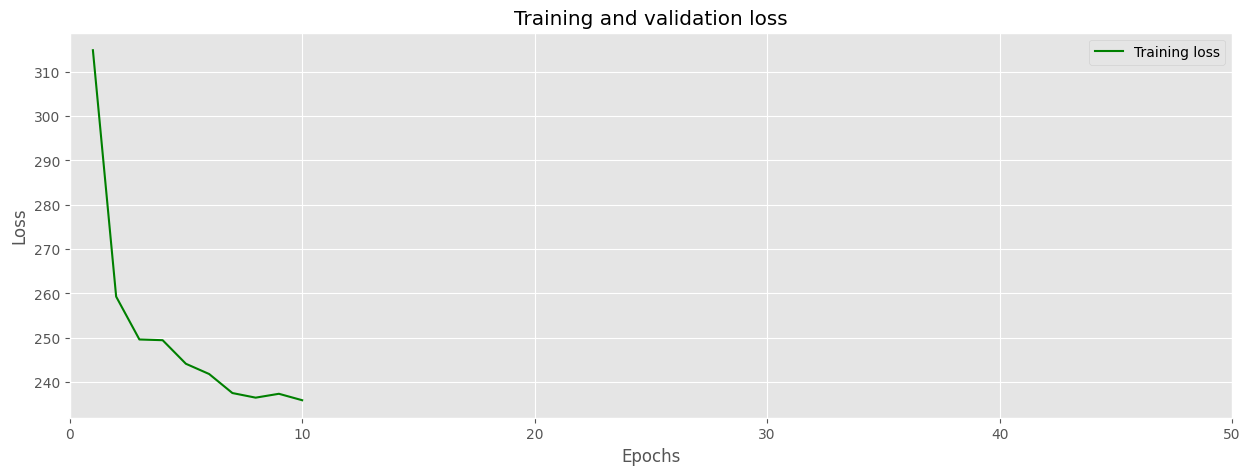

In [14]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "g", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xlim(0, 50)
plt.legend()
plt.grid(True)
plt.show()

## <font style="color: rgb(50, 120, 229);"> 3. Guardar y cargar modelos </font>

Guardar y cargar modelos es muy conveniente. Esto te permite desarrollar y entrenar un modelo, guardarlo en el sistema de archivos y luego cargarlo en algún momento futuro para su uso.

En esta sección cubriremos las operaciones básicas para guardar y cargar modelos.

### <font style="color: rgb(50, 120, 229);"> 3.1 Guardar un modelo </font>

Puedes guardar fácilmente un modelo usando el método `save()`, que guardará el modelo en el sistema de archivos en el formato 'SavedModel'.

Este método crea una carpeta en el sistema de archivos. Dentro de esta carpeta, la arquitectura del modelo y la configuración de entrenamiento (incluyendo el optimizador, las pérdidas y las métricas) se almacenan en saved_model.pb.

La carpeta 'variables/' contiene un punto de control estándar de entrenamiento que incluye los pesos del modelo. Profundizaremos en estos detalles en cuadernos posteriores.

Por ahora, simplemente guardemos el modelo entrenado y luego lo cargaremos en la siguiente celda de código con un nombre diferente y continuaremos usándolo en el resto del cuaderno.

In [15]:
model.save('MNIST_classifer_model.keras')

### <font style="color: rgb(50, 120, 229);"> 3.2 Cargar un modelo </font>

In [16]:
from keras.models import load_model

model = load_model('MNIST_classifer_model.keras')

## <font style="color: rgb(50, 120, 229);"> 4. Evaluación del modelo </font>

Ahora podemos predecir los resultados para todas las imágenes de prueba, como se muestra en el código a continuación.

Aquí, llamamos al método `predict()` para recuperar todas las predicciones, y luego seleccionamos un índice específico del conjunto de pruebas e imprimimos los puntajes predichos para cada clase.

Puedes experimentar con el código a continuación estableciendo el índice de prueba en varios valores y ver cómo el puntaje más alto generalmente está asociado con el valor correcto indicado por la verdad fundamental.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


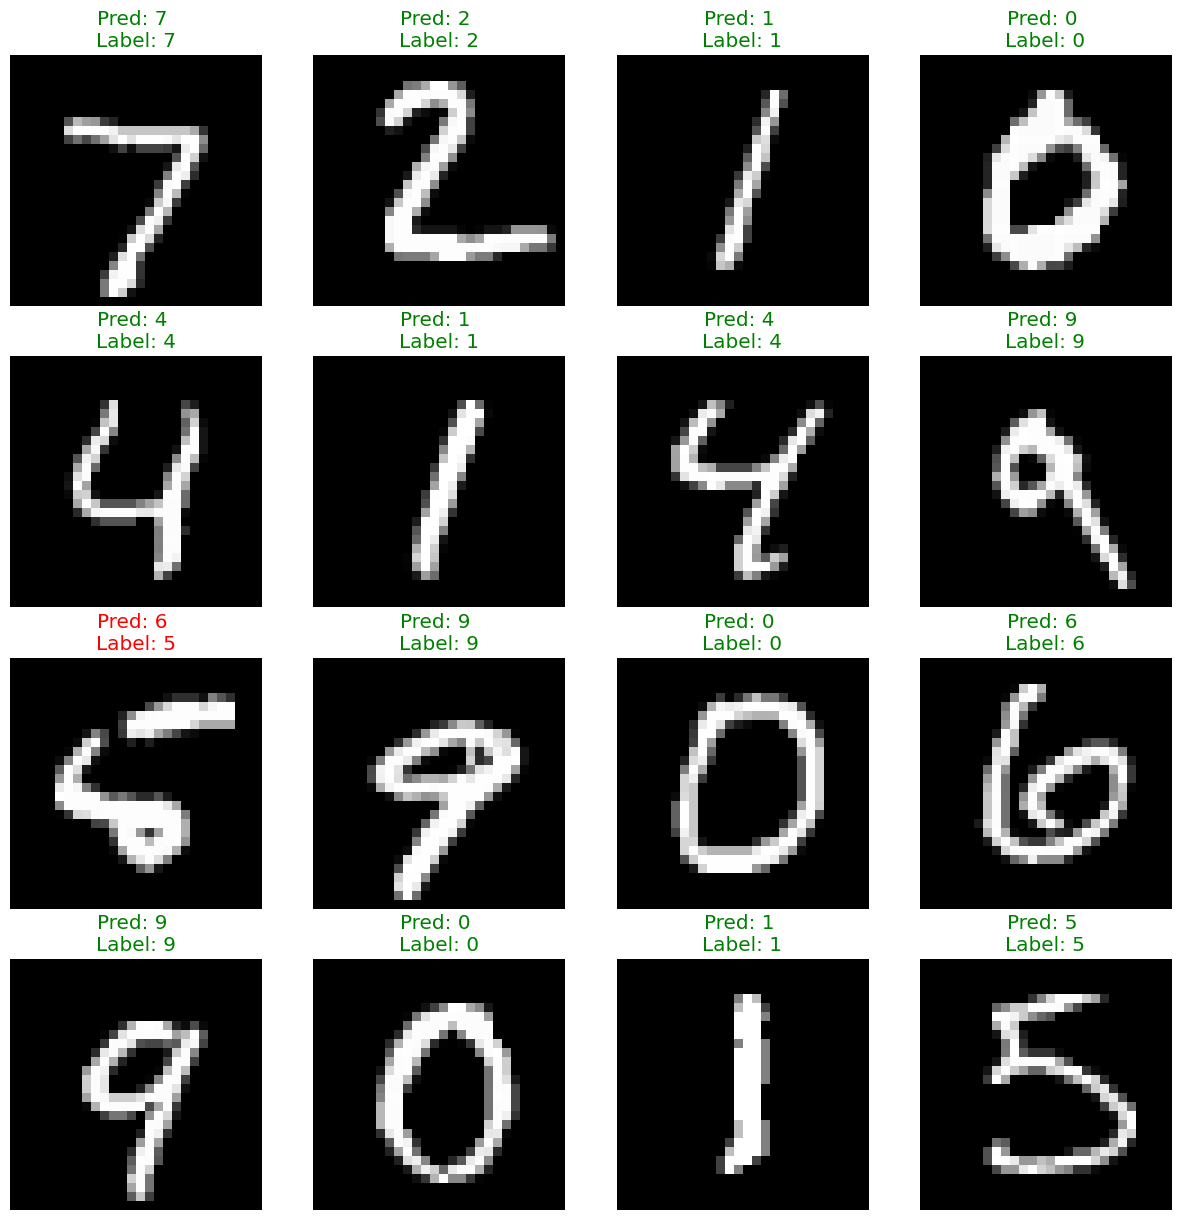

In [22]:

predictions = model.predict(reshaped_X_test)

num_samples = 16
num_cols = 4
num_rows = num_samples // num_cols

plt.figure(figsize=(15, 15))

for i in range(num_samples):
    image = reshaped_X_test[i].reshape(28, 28)
    pred = predictions[i]
    pred_label = pred.argmax() # obtiene el índice de la clase con mayor probabilidad
    real_label = y_test[i].argmax() # obtiene el índice de la clase real
    color = 'green' if pred_label == real_label else 'red'

    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Pred: {pred_label} \nLabel: {real_label}', color=color)
    plt.axis('off')

plt.show()

## <font style="color: rgb(50, 120, 229);"> Preguntas de comprensión </font>

1. ¿Qué es la clasificación multiclase?
2. ¿Qué función de activación se utiliza en la capa de salida de una red neuronal en un problema de clasificación multiclase?
3. ¿Qué me da como salida una red neuronal en un problema de clasificación multiclase?
4. ¿Qué función de pérdida se utiliza en un problema de clasificación multiclase?